In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [5]:
rawDS=pd.read_csv("heart.csv")

In [6]:
rawDS.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
rawDS.shape

(303, 14)

In [8]:
rawDS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
rawDS.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### The data has below columns

- age
- sex
- chest pain type (4 values)
- resting blood pressure
- serum cholestoral in mg/dl
- fasting blood sugar > 120 mg/dl
- resting electrocardiographic results (values 0,1,2)
- maximum heart rate achieved
- exercise induced angina
- oldpeak = ST depression induced by exercise relative to rest
- the slope of the peak exercise ST segment
- number of major vessels (0-3) colored by flourosopy
- thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

In [10]:
rawDS.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Our EDA starts here

In [11]:
firstDS=pd.read_csv("heart.csv")

In [12]:
#checking if we have the balanced dataset
firstDS.target.value_counts()

1    165
0    138
Name: target, dtype: int64

**Note:** *This is a balanced datasheet. If you see this it will be classical example of classification.*

<AxesSubplot:>

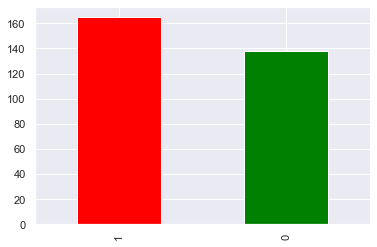

In [13]:
firstDS.target.value_counts().plot(kind='bar',color=["red","green"])

In [14]:
firstDS.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [16]:
firstDS.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [66]:
pd.crosstab( firstDS.sex, firstDS.target)

target,0,1
sex,,
0,24,72
1,114,93


<AxesSubplot:xlabel='target'>

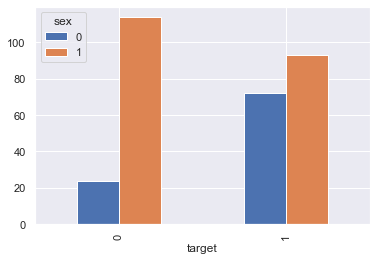

In [18]:
pd.crosstab(firstDS.target, firstDS.sex).plot(kind='bar')

Summary: sex is playing major role here. Alomst 73% women will have the heart disease.

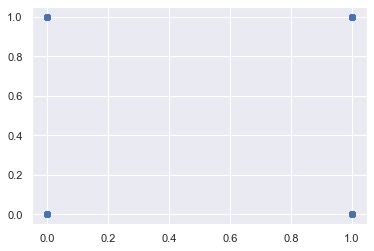

In [65]:
plt.scatter(firstDS.target, firstDS.sex)

In [59]:
pd.crosstab(firstDS.target, firstDS.cp)

cp,0,1,2,3
target,,,,
0,104,9,18,7
1,39,41,69,16


<AxesSubplot:xlabel='target'>

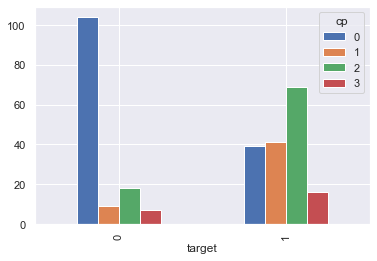

In [19]:
pd.crosstab(firstDS.target, firstDS.cp).plot(kind='bar')

In [20]:
firstDS.thalach.unique()

array([150, 187, 172, 178, 163, 148, 153, 173, 162, 174, 160, 139, 171,
       144, 158, 114, 151, 161, 179, 137, 157, 123, 152, 168, 140, 188,
       125, 170, 165, 142, 180, 143, 182, 156, 115, 149, 146, 175, 186,
       185, 159, 130, 190, 132, 147, 154, 202, 166, 164, 184, 122, 169,
       138, 111, 145, 194, 131, 133, 155, 167, 192, 121,  96, 126, 105,
       181, 116, 108, 129, 120, 112, 128, 109, 113,  99, 177, 141, 136,
        97, 127, 103, 124,  88, 195, 106,  95, 117,  71, 118, 134,  90],
      dtype=int64)

<AxesSubplot:ylabel='Frequency'>

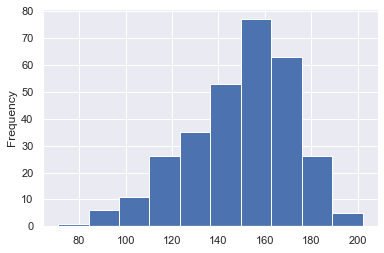

In [21]:
firstDS.thalach.plot.hist()

In [22]:
SDS=firstDS.loc[(firstDS['thalach'] >= 140) & (firstDS['thalach'] <= 180)]

In [23]:
SDS.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [24]:
SDS.count(0)

age         200
sex         200
cp          200
trestbps    200
chol        200
fbs         200
restecg     200
thalach     200
exang       200
oldpeak     200
slope       200
ca          200
thal        200
target      200
dtype: int64

<AxesSubplot:ylabel='Frequency'>

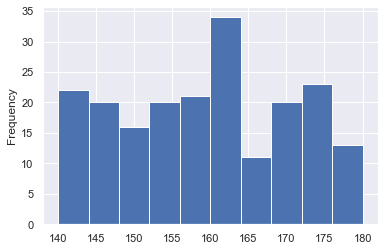

In [25]:
SDS.thalach.plot.hist()

In [63]:
SDS=firstDS.loc[(firstDS['thalach'] >= 140) & (firstDS['thalach'] <= 180)]

In [61]:
SDS.target.value_counts()

1    126
0     74
Name: target, dtype: int64

In [27]:
TDS=rawDS.loc[(firstDS['thalach'] < 140) | (firstDS['thalach'] > 180)]

In [28]:
TDS.count()

age         103
sex         103
cp          103
trestbps    103
chol        103
fbs         103
restecg     103
thalach     103
exang       103
oldpeak     103
slope       103
ca          103
thal        103
target      103
dtype: int64

In [29]:
TDS.target.value_counts()

0    64
1    39
Name: target, dtype: int64

**Note:** Here if we look closely we get to know that SDS has around 200 records(i.e. <140 thalach <180) and TDS has around 100 records(elsewise). In the SDS there are 63% chances that the person will have heart disease and in the TDS has some 37% of chances of that. Clearly we can see that the thalach means "maximum heart rate achieved" has the higher impact on the Target (may have heart disease.)

In [30]:
firstDS.trestbps.sort_values().unique()

array([ 94, 100, 101, 102, 104, 105, 106, 108, 110, 112, 114, 115, 117,
       118, 120, 122, 123, 124, 125, 126, 128, 129, 130, 132, 134, 135,
       136, 138, 140, 142, 144, 145, 146, 148, 150, 152, 154, 155, 156,
       160, 164, 165, 170, 172, 174, 178, 180, 192, 200], dtype=int64)

In [31]:
firstDS.trestbps.value_counts().sort_index()

94      2
100     4
101     1
102     2
104     1
105     3
106     1
108     6
110    19
112     9
114     1
115     3
117     1
118     7
120    37
122     4
123     1
124     6
125    11
126     3
128    12
129     1
130    36
132     8
134     5
135     6
136     3
138    13
140    32
142     3
144     2
145     5
146     2
148     2
150    17
152     5
154     1
155     1
156     1
160    11
164     1
165     1
170     4
172     1
174     1
178     2
180     3
192     1
200     1
Name: trestbps, dtype: int64

<AxesSubplot:ylabel='Frequency'>

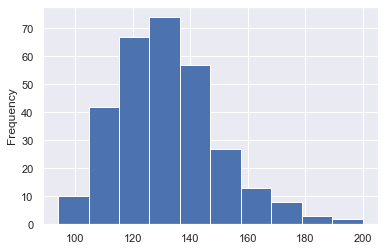

In [32]:
firstDS.trestbps.plot.hist()

In [33]:
firstDS.fbs.value_counts()

0    258
1     45
Name: fbs, dtype: int64

In [34]:
pd.crosstab(firstDS.target, firstDS.fbs)

fbs,0,1
target,,
0,116,22
1,142,23


<AxesSubplot:xlabel='target'>

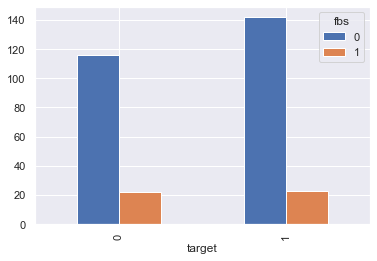

In [35]:
pd.crosstab(firstDS.target, firstDS.fbs).plot(kind='bar')

**Note:**  So FBS is not contributing much in the target

Till here we were checking that if nay parameter plays any majoir role in the prediction.<br>
lets check through heatmap for closing this parameter.

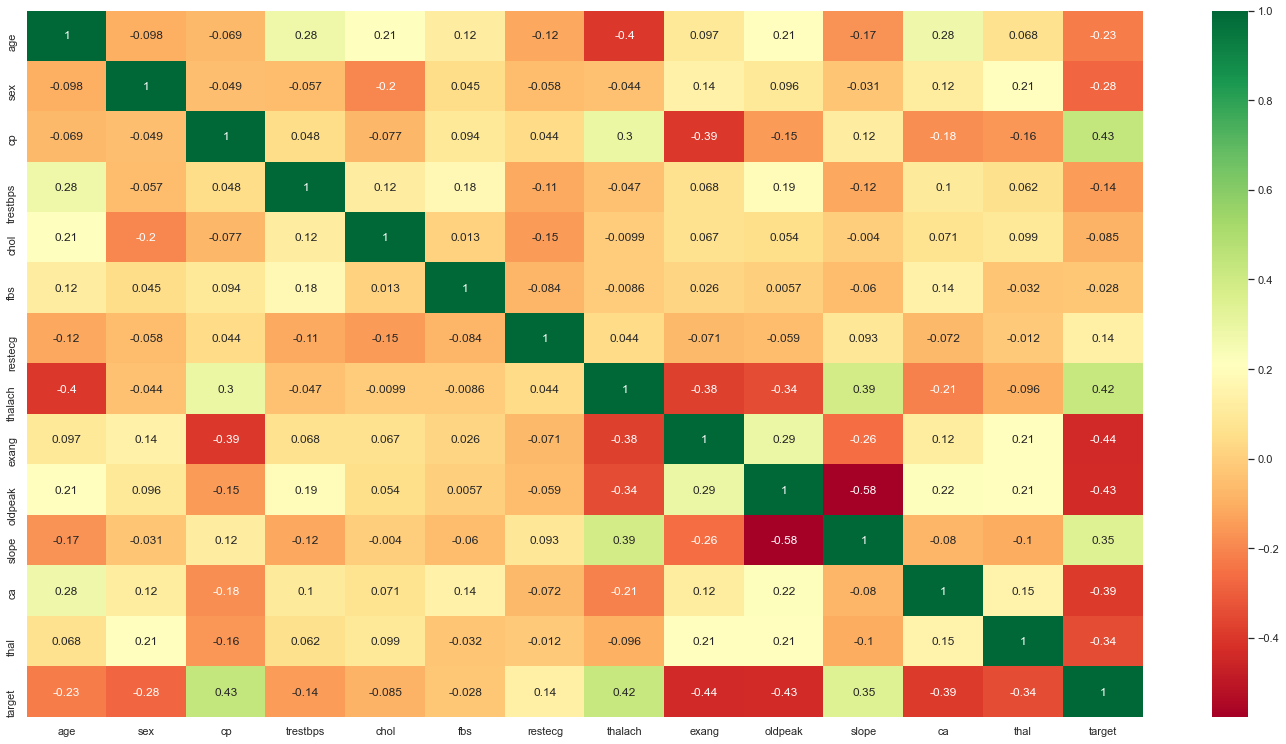

In [58]:
plt.figure(figsize=(25,13))
sns.heatmap(firstDS.corr(),annot=True,cmap="RdYlGn")
plt.show()

## 

Till here we were checking that if nay parameter plays any majoir role in the prediction. Now lets have the dataset splitted properly so that we can train model and test it accordingly.

In [37]:
X=firstDS.drop(columns='target')

In [38]:
y=firstDS['target']

In [39]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)

## 

## Modeling    

This is a classic example of classification because we need the output in either 0 or 1.<br>
Now let see how many classification algorithm we have.

 - LogisticRegresion
 - K-Nearest neighbour
 - Randomforest Algorithm

**Note:** We will have all the model in a dictionary and create the function to train the model one by one. We will store the score of each model with their name in one list and return the list.

In [40]:
models={
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(), 
    "Random Forest": RandomForestClassifier()
}

In [41]:
def trainingTheModels(Model,X_train, X_test, y_train, y_test):
    model_scores={}
    for name, model in Model.items():
        model.fit(X_train,y_train)
        model_scores[name]=model.score(X_test,y_test)
    return model_scores

In [42]:
all_model_score=trainingTheModels(Model=models,
                                 X_train=X_train,
                                 X_test=X_test,
                                 y_train=y_train,
                                 y_test=y_test)


C:\Users\aditya.srivastva\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [43]:
all_model_score

{'KNN': 0.6885245901639344,
 'Logistic Regression': 0.8852459016393442,
 'Random Forest': 0.8360655737704918}

In [44]:
plt.figure(figsize=(10,5))

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

In [45]:
RFCModel=models["Random Forest"]

<AxesSubplot:>

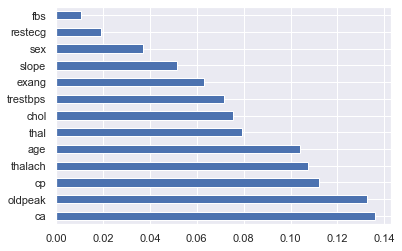

In [46]:
# Below we have the feature importance for the RandomForestClassifier model
feat_importance=pd.Series(RFCModel.feature_importances_,index=X.columns)
feat_importance.nlargest(15).plot(kind='barh')

YOO..! Now we have all three model and their score. Lookinf at the score we can say that we have Logistic Regresion and Random forest has good score. From this point of time we can drop the idea for using KNN model which did not produce good score.

Now what...Next.????<br>
Hmm....we can think of hyperparameter tuning as well. let see if we can increase the model efficiency....

## 
### Hyperparameter Tuning

Lets do the hyperparameter tuning using RandomizedSearchCV algorithm for LogisticRegression

In [47]:
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

In [48]:
RSCV_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

In [49]:
RSCV_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.6s finished


In [50]:
RSCV_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [51]:
RSCV_log_reg.score(X_test,y_test)

0.8852459016393442

Great we can see even if we hyperparameter tune the Logistic Regression dosnot yeild much here.

Lets do the hyperparameter tuning using RandomizedSearchCV algorithm for RandomForestClassifier

In [52]:
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [53]:
RSCV_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

In [54]:
RSCV_rf.fit(X_train, y_train);

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   57.5s finished


In [55]:
RSCV_rf.score(X_test,y_test)

0.8688524590163934

Awesome we got the score little better.

In [56]:
# Now lets check what will be the best parameter for the RandomForestClassifier
RSCV_rf.best_params_

{'n_estimators': 310,
 'min_samples_split': 16,
 'min_samples_leaf': 13,
 'max_depth': 5}

Now once we have the best parameter we can use the GridSearchCV to optimise the score little bit more also